In [ ]:
# Assumed parameters from the provided data
measured_voltages = [-0.01, 0.105, 0.195, 0.28, 0.37, 0.48, 0.6, 0.75]  # Example measured voltages
LSB_level = 0.1  # Ideal LSB level in volts
offset_error_correction = 0.01  # Offset error correction
actual_gain = (measured_voltages[-1] - measured_voltages[0]) / 7  # Calculating actual gain from end points

# Step 1: Calculate corrected codes
corrected_codes = [(voltage + offset_error_correction) / actual_gain for voltage in measured_voltages]

# Step 2: Calculate DNL for each step
dnl = [corrected_codes[i] - corrected_codes[i-1] - 1 for i in range(1, len(corrected_codes))]

# Step 3: Calculate INL for each code
inl = [sum(dnl[:i]) for i in range(len(dnl))]
inl.insert(0, 0)  # The INL at the first point is 0 by definition

# Display the results
print("Corrected Codes:", corrected_codes)
print("DNL:", dnl)
print("INL:", inl)


Corrected Codes: [0.0, 1.0592105263157894, 1.8881578947368423, 2.671052631578948, 3.5, 4.5131578947368425, 5.618421052631579, 7.0]
DNL: [0.05921052631578938, -0.17105263157894712, -0.21710526315789447, -0.1710526315789478, 0.01315789473684248, 0.10526315789473628, 0.38157894736842124]
INL: [0, 0, 0.05921052631578938, -0.11184210526315774, -0.3289473684210522, -0.5, -0.4868421052631575, -0.38157894736842124]


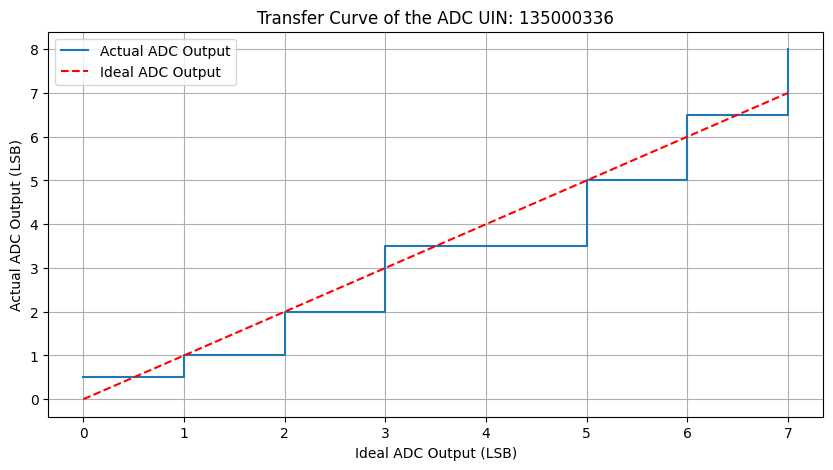

(array([ 0.5,  0. ,  0. ,  0.5, -0.5,  0. ,  0.5,  0.5]),
 array([0.5, 1. , 2. , 3.5, 3.5, 5. , 6.5, 8. ]))

In [1]:
#q5
import numpy as np
import matplotlib.pyplot as plt

# Given DNL values for a 3-bit ADC (8 codes total)
dnl_values = np.array([0, -0.5, 0, +0.5, -1, +0.5, +0.5, 0])
# Given offset and full scale errors
offset_error = 0.5
full_scale_error = 0.5


inl_values = np.cumsum(dnl_values) + offset_error

# Ideal output steps for a 3-bit ADC without errors
ideal_output = np.arange(8)

# Actual output steps including INL
actual_output = ideal_output + inl_values

# Applying full-scale error
actual_output[-1] += full_scale_error

# Plot the transfer curve
plt.figure(figsize=(10, 5))
plt.step(ideal_output, actual_output, where='post', label='Actual ADC Output')
plt.plot(ideal_output, ideal_output, linestyle='--', color='red', label='Ideal ADC Output')
plt.title('Transfer Curve of the ADC UIN: 135000336')
plt.xlabel('Ideal ADC Output (LSB)')
plt.ylabel('Actual ADC Output (LSB)')
plt.grid(True)
plt.legend()
plt.show()

# Returning the INL values and preparing the actual_output for any further processing if needed.
inl_values, actual_output


Corrected Codes: [0.0, 1.0592105263157894, 1.8881578947368423, 2.671052631578948, 3.5, 4.5131578947368425, 5.618421052631579, 7.0]
ideal Codes: [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001]


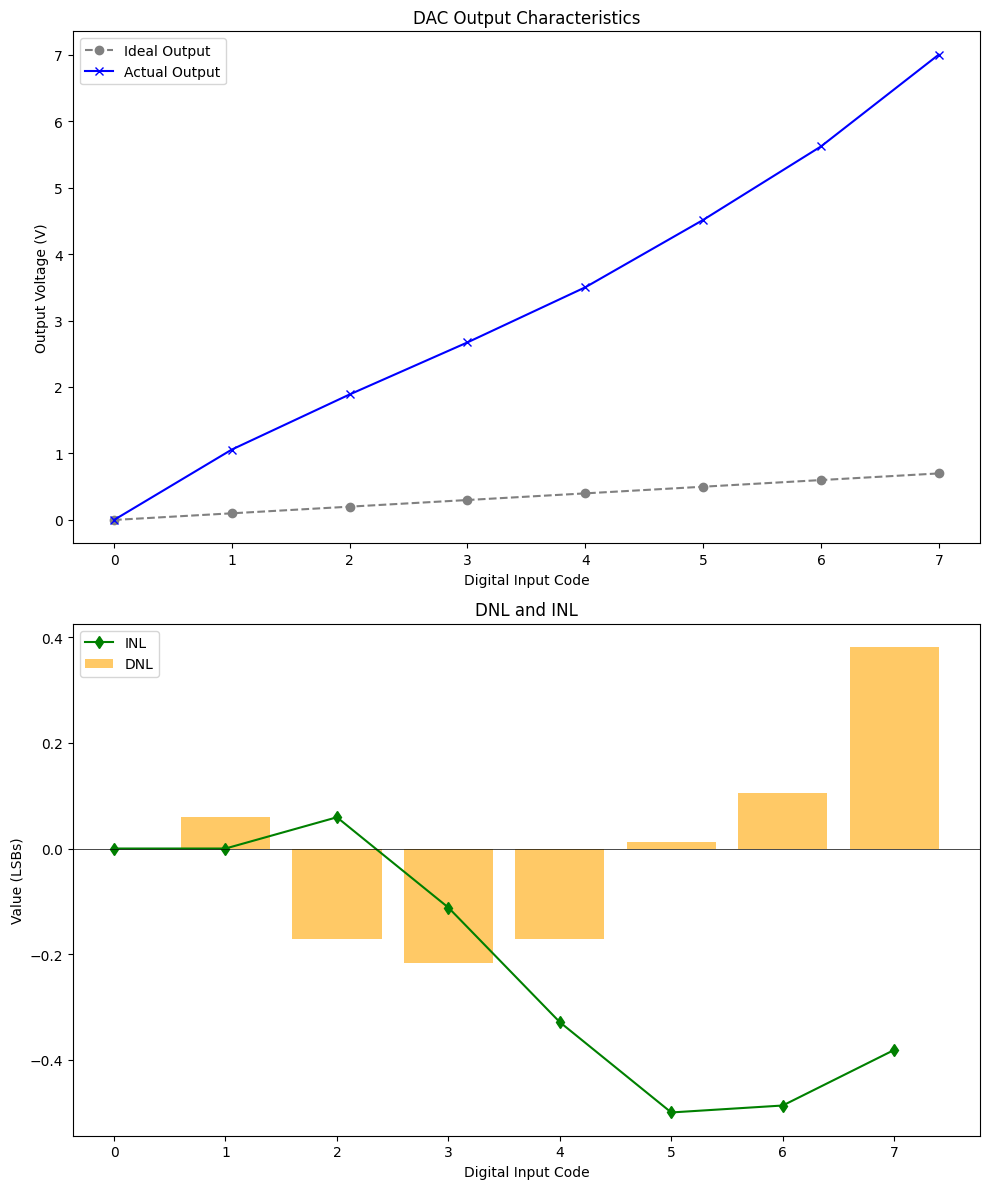

In [ ]:
import matplotlib.pyplot as plt
measured_voltages = [-0.01, 0.105, 0.195, 0.28, 0.37, 0.48, 0.6, 0.75]  # Example measured voltages
LSB_level = 0.1  # Ideal LSB level in volts
offset_error_correction = 0.01  # Offset error correction
# Calculate corrected codes, DNL, and INL using the given parameters and formulas
corrected_codes = [(voltage + offset_error_correction) / actual_gain for voltage in measured_voltages]
dnl = [corrected_codes[i] - corrected_codes[i-1] - 1 for i in range(1, len(corrected_codes))]
inl = [sum(dnl[:i]) for i in range(len(dnl))]
inl.insert(0, 0)  # The INL at the first point is 0 by definition

# Ideal DAC characteristics (straight line from 0 to 7 * LSB_level)
ideal_codes = [i * LSB_level for i in range(len(measured_voltages))]
#ideal_lsb=ideal_codes*10
# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

print("Corrected Codes:", corrected_codes)
print("ideal Codes:", ideal_codes)
# Plot DAC characteristics
axs[0].plot(ideal_codes, label='Ideal Output', marker='o', linestyle='--', color='gray')
axs[0].plot(corrected_codes, label='Actual Output', marker='x', linestyle='-', color='blue')
axs[0].set_title('DAC Output Characteristics')
axs[0].set_xlabel('Digital Input Code')
axs[0].set_ylabel('Output Voltage (V)')
axs[0].legend()

# Plot DNL and INL
axs[1].bar(range(1, len(dnl)+1), dnl, label='DNL', alpha=0.6, color='orange')
axs[1].plot(range(len(inl)), inl, label='INL', marker='d', linestyle='-', color='green')
axs[1].set_title('DNL and INL')
axs[1].set_xlabel('Digital Input Code')
axs[1].set_ylabel('Value (LSBs)')
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].legend()

plt.tight_layout()
plt.show()
